In [29]:
import pandas as pd
import numpy as np
import pickle
import re
import spacy
import gensim
import string
import os
import glob
import nltk

In [30]:
os.chdir("D:/Digitales/") #Cambiando el directorio

In [31]:
# Primero especificamos un patrón del archivo y lo pasamos como parámetro en la función glob
csv_files = glob.glob('*.csv')
# Mostrar el archivo csv_files, el cual es una lista de nombres
print(csv_files)

['BD_WHATSAPP_EMTELCO_HOGAR_2021-03-14.csv']


In [32]:
list_data = []
# Escribimos un loop que irá a través de cada uno de los nombres de archivo a través de globbing y el resultado final será la lista dataframes

for filename in csv_files:
    data1 = pd.read_csv(filename, encoding='utf-8', sep=";")
    list_data.append(data1)

#Para chequear que todo está bien, mostramos la list_data por consola
list_data
DATAC = pd.concat(list_data,ignore_index=True)

In [33]:
DATAC

,id_zendesks,assignee_id,nombre_assignee,fecha_zendesk,group_id_chat,grupo_homologado,subject,tags_zendesk,time_spent_last_update_sec,total_time_spent_sec,canal_tigo,b2_c_solicitud_hogar,b2_c_solicitud_mvil,fecha_cat,author_id,role,name,Celular,nmero_de_documento,body
0,35175982,3.841698e+11,MiguelF_Regionales,2021-03-08 13:01:53.000000,360011773393,CO :: Eje Cafetero,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_grupo_corr...",12.0,204.0,canaltigo_messaging_whatsapp,topico_hogar_otros,NaN,2021-03-08 13:01:58,3.644109e+11,admin,Liza ??,5.731469e+11,1088258495,08/03/2021 07:51:45 Juliana==>Buenos días nece...
1,35175982,3.841698e+11,MiguelF_Regionales,2021-03-08 13:01:53.000000,360011773393,CO :: Eje Cafetero,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_grupo_corr...",12.0,204.0,canaltigo_messaging_whatsapp,topico_hogar_otros,NaN,2021-03-08 13:03:49,3.934260e+11,agent,SebastianR_Regionales,5.731469e+11,1088258495,¡Hola! ¿Como te encuentras hoy? ¡Te damos la B...
2,35175982,3.841698e+11,MiguelF_Regionales,2021-03-08 13:01:53.000000,360011773393,CO :: Eje Cafetero,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_grupo_corr...",12.0,204.0,canaltigo_messaging_whatsapp,topico_hogar_otros,NaN,2021-03-08 13:18:30,3.934260e+11,agent,SebastianR_Regionales,5.731469e+11,1088258495,Juliana hemos realizado la autorización del pa...
3,35175982,3.841698e+11,MiguelF_Regionales,2021-03-08 13:01:53.000000,360011773393,CO :: Eje Cafetero,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_grupo_corr...",12.0,204.0,canaltigo_messaging_whatsapp,topico_hogar_otros,NaN,2021-03-08 13:29:13,3.841698e+11,agent,MiguelF_Regionales,5.731469e+11,1088258495,Resuelto
4,35175982,3.841698e+11,MiguelF_Regionales,2021-03-08 13:01:53.000000,360011773393,CO :: Eje Cafetero,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_grupo_corr...",12.0,204.0,canaltigo_messaging_whatsapp,topico_hogar_otros,NaN,2021-03-08 13:10:09,4.297413e+11,end-user,Juliana,5.731469e+11,1088258495,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373046,35460721,NaN,NaN,2021-03-14 23:59:20.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,canaltigo_messaging_whatsapp,topico_hogar_otros,NaN,2021-03-14 23:59:58,4.195861e+11,end-user,0819,5.730059e+11,71731348,alejandromonsalvegiraldo@gmail.com
373047,35460737,NaN,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,canaltigo_messaging_whatsapp,topico_hogar_otros,NaN,2021-03-14 23:59:56,1.503647e+12,end-user,Angel Millan,5.732425e+11,1152709984,Consulta desde WhatsApp
373048,35460737,NaN,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,canaltigo_messaging_whatsapp,topico_hogar_otros,NaN,2021-03-15 00:00:33,1.503647e+12,end-user,Angel Millan,5.732425e+11,1152709984,No sé cuál es el número de contrato del servic...
373049,35460737,NaN,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,canaltigo_messaging_whatsapp,topico_hogar_otros,NaN,2021-03-15 00:00:59,1.503647e+12,end-user,Angel Millan,5.732425e+11,1152709984,Tengo 2 servicios activos con ustedes


In [34]:
DATAC.name.isnull().sum()

71

In [35]:
os.chdir("//10.1.1.7/01 Oficina Planeación y Control/01 Analytics/Mabe/Zendesk/GoodData/") #Cambiando el directorio

In [36]:
# Primero especificamos un patrón del archivo y lo pasamos como parámetro en la función glob
xlsx_files = glob.glob('*.xlsx')
# Mostrar el archivo csv_files, el cual es una lista de nombres
print(xlsx_files)

['CO-Tipificacion Whatsapp Hogar1.xlsx', 'CO-Tipificacion Whatsapp Hogar2.xlsx', 'CO-Tipificacion Whatsapp Hogar3.xlsx']


In [37]:
list_data = []
# Escribimos un loop que irá a través de cada uno de los nombres de archivo a través de globbing y el resultado final será la lista dataframes

for filename in xlsx_files:
    data = pd.read_excel(filename)
    list_data.append(data)

#Para chequear que todo está bien, mostramos la list_data por consola
list_data
Tipologias = pd.concat(list_data,ignore_index=True)

In [38]:
#Tipologias=pd.read_excel('//10.1.1.7/01 Oficina Planeación y Control/01 Analytics/Mabe/Zendesk/GoodData/CO-Tipificacion Whatsapp Hogar1.xlsx')

In [39]:
Tipologias.columns

Index(['Ticket Id', 'Tipo de Gestión :: Residencial', 'Ticket Group',
       'Ticket Status', 'Ticket Assignee', 'Date (Ticket Solved)', 'AHT',
       'Número de Celular'],
      dtype='object')

In [40]:
Tipologias

,Ticket Id,Tipo de Gestión :: Residencial,Ticket Group,Ticket Status,Ticket Assignee,Date (Ticket Solved),AHT,Número de Celular
0,33572981,Venta Nueva :: Alta de Servicio :: Paquetes Re...,CO :: B2C :: WhatsApp Hogares,Closed,mmonsalo_WpHogar,2021-02-01,48.666667,NaN
1,32999329,Factura/Cobro :: Notificacion de Cobro :: Se B...,CO :: B2C :: WhatsApp Hogares,Closed,jgomezat_WpHogar,2021-01-19,57.650000,NaN
2,33364539,Visita Tecnica/Averias :: Informacion Visita T...,CO :: Eje Cafetero,Closed,sramirod_WpRegionales,2021-01-27,27.533333,NaN
3,33255750,Internet Fijo HFC :: Inestabilidad/Lentitud ::...,CO :: Soporte Técnico,Closed,dmarinza_WpST,2021-01-26,13.216667,NaN
4,32274768,Pagos/Reactivaciones :: Pagar Factura :: Pago ...,CO :: Eje Cafetero,Closed,dmiralon_WpRegionales,2021-01-03,6.916667,NaN
...,...,...,...,...,...,...,...,...
266788,35680117,Modificar Productos/Servicios :: Trasladar Ser...,CO :: B2C :: WhatsApp Hogares,Solved,msepulvl_WpHogar,2021-03-19,2.766667,573128043715
266789,35680118,NaN,CO :: Soporte Técnico,Open,NaN,NaT,0.250000,573023931358
266790,35680128,NaN,CO :: B2C :: WhatsApp Hogares,Open,emoraler_WpHogar,NaT,0.416667,573045501558
266791,35680244,NaN,CO :: B2C :: WhatsApp Hogares,Open,fgarciav_WpST,NaT,0.700000,573127725167


In [41]:
Tipologias.rename(columns={'Ticket Id': 'id_zendesks'}, inplace=True)

In [42]:
DATAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373051 entries, 0 to 373050
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_zendesks                 373051 non-null  int64  
 1   assignee_id                 237382 non-null  float64
 2   nombre_assignee             237382 non-null  object 
 3   fecha_zendesk               373051 non-null  object 
 4   group_id_chat               373051 non-null  int64  
 5   grupo_homologado            373051 non-null  object 
 6   subject                     373051 non-null  object 
 7   tags_zendesk                373051 non-null  object 
 8   time_spent_last_update_sec  285781 non-null  float64
 9   total_time_spent_sec        285781 non-null  float64
 10  canal_tigo                  373051 non-null  object 
 11  b2_c_solicitud_hogar        373051 non-null  object 
 12  b2_c_solicitud_mvil         1054 non-null    object 
 13  fecha_cat     

In [43]:
Tipologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266793 entries, 0 to 266792
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id_zendesks                     266793 non-null  int64         
 1   Tipo de Gestión :: Residencial  227677 non-null  object        
 2   Ticket Group                    266793 non-null  object        
 3   Ticket Status                   266793 non-null  object        
 4   Ticket Assignee                 209311 non-null  object        
 5   Date (Ticket Solved)            262224 non-null  datetime64[ns]
 6   AHT                             266793 non-null  float64       
 7   Número de Celular               148223 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 16.3+ MB


In [44]:
DATAC["id_zendesks"] = DATAC["id_zendesks"].astype(str)

In [45]:
Tipologias["id_zendesks"] = Tipologias["id_zendesks"].astype(str)

In [46]:
DATAC=pd.merge(DATAC, Tipologias, on='id_zendesks')

In [84]:
DATATIP = DATAC[DATAC['grupo_homologado'].isin(['CO :: B2C :: WhatsApp Hogares', 'CO :: Soporte Técnico'])]

In [85]:
DATATIP

,id_zendesks,assignee_id,nombre_assignee,fecha_zendesk,group_id_chat,grupo_homologado,subject,tags_zendesk,time_spent_last_update_sec,total_time_spent_sec,...,Celular,nmero_de_documento,body,Tipo de Gestión :: Residencial,Ticket Group,Ticket Status,Ticket Assignee,Date (Ticket Solved),AHT,Número de Celular
10,35173165,NaN,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,...,5.732090e+11,NaN,3 ¿CON CUAL DE LAS SIGUIENTES ENTIDADES USTED ...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149.016667,573208988955
11,35173165,NaN,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,...,5.732090e+11,NaN,Vamos a trabajar en tu solicitud y en un momen...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149.016667,573208988955
12,35173165,NaN,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,...,5.732090e+11,NaN,¡Hola Xiomy Acero Ruiz ! ?? Te damos la Bienve...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149.016667,573208988955
13,35173165,NaN,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,...,5.732090e+11,NaN,Podemos ofrecerte:DUO PLAY INTERNET 30 MEGAS +...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149.016667,573208988955
14,35173165,NaN,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,...,5.732090e+11,NaN,Vamos a proceder a realizar las preguntas resp...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149.016667,573208988955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310267,35460721,NaN,NaN,2021-03-14 23:59:20.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,...,5.730059e+11,71731348,alejandromonsalvegiraldo@gmail.com,NaN,CO :: B2C :: WhatsApp Hogares,Closed,Jpenarap_WpHogar,2021-03-15,5.766667,573005927108
310268,35460737,NaN,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,...,5.732425e+11,1152709984,Consulta desde WhatsApp,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,Closed,jaguirrl_WpHogar,2021-03-15,2.350000,573242499287
310269,35460737,NaN,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,...,5.732425e+11,1152709984,No sé cuál es el número de contrato del servic...,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,Closed,jaguirrl_WpHogar,2021-03-15,2.350000,573242499287
310270,35460737,NaN,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",NaN,NaN,...,5.732425e+11,1152709984,Tengo 2 servicios activos con ustedes,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,Closed,jaguirrl_WpHogar,2021-03-15,2.350000,573242499287


In [86]:
DATATIP.columns

Index(['id_zendesks', 'assignee_id', 'nombre_assignee', 'fecha_zendesk',
       'group_id_chat', 'grupo_homologado', 'subject', 'tags_zendesk',
       'time_spent_last_update_sec', 'total_time_spent_sec', 'canal_tigo',
       'b2_c_solicitud_hogar', 'b2_c_solicitud_mvil', 'fecha_cat', 'author_id',
       'role', 'name', 'Celular', 'nmero_de_documento', 'body',
       'Tipo de Gestión :: Residencial', 'Ticket Group', 'Ticket Status',
       'Ticket Assignee', 'Date (Ticket Solved)', 'AHT', 'Número de Celular'],
      dtype='object')

In [87]:
DATATIP = DATATIP[['id_zendesks', 'Tipo de Gestión :: Residencial', 'grupo_homologado', 'fecha_zendesk']] 

In [88]:
DATATIP.columns = ['Id_Zendesk', 'tipologias', 'grupo', 'FECHA']

In [89]:
DATATIP

,Id_Zendesk,tipologias,grupo,FECHA
10,35173165,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,2021-03-08 04:15:49.000000
11,35173165,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,2021-03-08 04:15:49.000000
12,35173165,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,2021-03-08 04:15:49.000000
13,35173165,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,2021-03-08 04:15:49.000000
14,35173165,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,2021-03-08 04:15:49.000000
...,...,...,...,...
310267,35460721,NaN,CO :: B2C :: WhatsApp Hogares,2021-03-14 23:59:20.000000
310268,35460737,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,2021-03-14 23:59:56.000000
310269,35460737,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,2021-03-14 23:59:56.000000
310270,35460737,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,2021-03-14 23:59:56.000000


In [90]:
DATATIP.to_excel("D:/Gabo/SAC/tipolog.xlsx", index =False)

In [20]:
DATAC.columns

Index(['id_zendesks', 'assignee_id', 'nombre_assignee', 'fecha_zendesk',
       'group_id_chat', 'grupo_homologado', 'subject', 'tags_zendesk',
       'time_spent_last_update_sec', 'total_time_spent_sec', 'canal_tigo',
       'b2_c_solicitud_hogar', 'b2_c_solicitud_mvil', 'fecha_cat', 'author_id',
       'role', 'name', 'Celular', 'nmero_de_documento', 'body',
       'Tipo de Gestión :: Residencial', 'Ticket Group', 'Ticket Status',
       'Ticket Assignee', 'Date (Ticket Solved)', 'AHT', 'Número de Celular'],
      dtype='object')

In [21]:
DATAC.name

0                       Liza ??
1         SebastianR_Regionales
2         SebastianR_Regionales
3            MiguelF_Regionales
4                       Juliana
                  ...          
310267                     0819
310268             Angel Millan
310269             Angel Millan
310270             Angel Millan
310271                  Liza ??
Name: name, Length: 310272, dtype: object

In [22]:
DATAC["fecha_zendesk"].value_counts()

2021-03-10 13:02:58.000000    300
2021-03-11 19:57:33.000000    254
2021-03-08 14:43:24.000000    203
2021-03-08 17:34:16.000000    199
2021-03-09 15:49:58.000000    192
                             ... 
2021-03-14 23:49:51.000000      2
2021-03-08 16:45:16.000000      1
2021-03-11 17:08:00.000000      1
2021-03-11 22:34:01.000000      1
2021-03-12 20:32:53.000000      1
Name: fecha_zendesk, Length: 15778, dtype: int64

In [23]:
#QAS=pd.read_excel('HistConsultas.xlsx')

In [24]:
#data = pd.merge(DATAC, QAS, on = 'ID_Cuenta', how = 'inner')

#data.head()

In [25]:
DATAC.name.value_counts()

Liza ??              16425
Administrator         8243
??                    5378
.                     3289
????                  1524
                     ...  
Vanessa Grisalez         1
Llayo Lopez              1
Yulia                    1
Carolina Betancur        1
yeimi03152525            1
Name: name, Length: 12080, dtype: int64

### Grupo Whatsapp Hogares

In [27]:
#DATAC = DATAC[DATAC['grupo_homologado'].isin(['CO :: Soporte Técnico','CO1 :: SPC :: Nivel 2','CO :: B2B :: Soporte'])]
DATAC = DATAC[DATAC['grupo_homologado'].isin(['CO :: B2C :: WhatsApp Hogares'])]

In [28]:
DATAC.grupo_homologado.value_counts()

CO :: B2C :: WhatsApp Hogares    190267
Name: grupo_homologado, dtype: int64

In [50]:
pd.options.display.float_format = '{:.0f}'.format
dataC = DATAC.drop(DATAC[DATAC['name']=="Liza ??"].index)
data = dataC.dropna(subset=["body"])

In [51]:
data.name.value_counts()

Administrator           4085
??                      3302
.                       1959
YeisonVH_WpHogar        1140
IvanC_WpHogar           1063
                        ... 
Jhon Bustos                1
Madys Marín                1
??JESSY??                  1
Santiago O_Retención       1
Mildred Orjuela            1
Name: name, Length: 8605, dtype: int64

In [52]:
data['body']=data['body'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

C:\Users\dgarmor\.conda\envs\Environments\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
# Limpieza, carecteres especiales y signos de puntuacion
def limpieza_basica(body):
    body=re.sub(pattern= r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",repl=' ', string=body)
    body = body.lower()
    body = re.sub(" \d+",'', body) #Eliminar numeros
    body = re.sub('[^a-z ]','', body) #quitar numeros dentro de palabras
    body = re.sub('\[#*>=\]','',body) # Eliminar caracteres 
    body = re.sub('[%s]' %re.escape(string.punctuation),' ', body) # Eliminar signos puntuacion
    #body= re.sub(r"[\r\n]+",' ', body)
    body= re.compile(r'\bLiza\b').sub('', body)
    #body=re.sub("\s\s+" , " ", body)
    body=re.sub(pattern= r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",repl='', string=body)   
    body=re.sub(r'([\w\d\.]+)@[\w\d\.]+' , "", body)
    return body
limpiar = lambda x: limpieza_basica(x)

In [54]:
data.bodylen = data.body.str.replace('\s+', ' ')

C:\Users\dgarmor\.conda\envs\Environments\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [55]:
data["body"] = data["body"].apply(limpiar)

C:\Users\dgarmor\.conda\envs\Environments\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
data["bodylen"] = data["body"].str.len()

C:\Users\dgarmor\.conda\envs\Environments\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
data

,id_zendesks,assignee_id,nombre_assignee,fecha_zendesk,group_id_chat,grupo_homologado,subject,tags_zendesk,time_spent_last_update_sec,total_time_spent_sec,...,nmero_de_documento,body,Tipo de Gestión :: Residencial,Ticket Group,Ticket Status,Ticket Assignee,Date (Ticket Solved),AHT,Número de Celular,bodylen
10,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,con cual de las siguientes entidades usted ti...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,252
11,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,vamos a trabajar en tu solicitud y en un momen...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,112
12,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,hola xiomy acero ruiz te damos la bienvenida...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,215
13,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,podemos ofrecerteduo play internet megas tele...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,354
14,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,vamos a proceder a realizar las preguntas resp...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310266,35460721,nan,NaN,2021-03-14 23:59:20.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,71731348,buenas deseo un apollo para pagar,NaN,CO :: B2C :: WhatsApp Hogares,Closed,Jpenarap_WpHogar,2021-03-15,6,573005927108,33
310267,35460721,nan,NaN,2021-03-14 23:59:20.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,71731348,alejandromonsalvegiraldogmailcom,NaN,CO :: B2C :: WhatsApp Hogares,Closed,Jpenarap_WpHogar,2021-03-15,6,573005927108,32
310268,35460737,nan,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,1152709984,consulta desde whatsapp,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,Closed,jaguirrl_WpHogar,2021-03-15,2,573242499287,23
310269,35460737,nan,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,1152709984,no se cual es el numero de contrato del servic...,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,Closed,jaguirrl_WpHogar,2021-03-15,2,573242499287,90


### PERCENTILES

Para identificar los outliers se necesita el rango intercuatílico. IQR = Q3-Q1

In [58]:
IQR = data['bodylen'].quantile(0.75) - data['bodylen'].quantile(0.25)
IQR

99.0

Ahora, los outliers son aquellos valores que están por encima o por debajo de los bigotes en el gráfico de cajas, para identificar estos limites de manera numérica se hace mediante las formulas:

b1 = Q1 - IQR*1.5

b2 = Q3 + IQR*1.5

In [59]:
data['bodylen'].quantile(0.10)

7.0

In [60]:
b1 = data['bodylen'].quantile(0.25) - IQR*1.5 
b1

-129.5

In [61]:
b2 = data['bodylen'].quantile(0.75) + IQR*1.5 
b2

266.5

In [62]:
data['bodylen'].quantile(0.90)

288.0

In [63]:
data1 = data[(data['bodylen'] > 7) & (data['bodylen'] < 288)]

In [65]:
data1.index = range(data1.shape[0])

In [66]:
data1

,id_zendesks,assignee_id,nombre_assignee,fecha_zendesk,group_id_chat,grupo_homologado,subject,tags_zendesk,time_spent_last_update_sec,total_time_spent_sec,...,nmero_de_documento,body,Tipo de Gestión :: Residencial,Ticket Group,Ticket Status,Ticket Assignee,Date (Ticket Solved),AHT,Número de Celular,bodylen
0,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,con cual de las siguientes entidades usted ti...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,252
1,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,vamos a trabajar en tu solicitud y en un momen...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,112
2,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,hola xiomy acero ruiz te damos la bienvenida...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,215
3,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,cl d sur,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,10
4,35173165,nan,NaN,2021-03-08 04:15:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,NaN,xiomy acero ruiz cc expediciondici...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,mpazrodr_WpHogar,2021-03-08,149,573208988955,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140840,35460721,nan,NaN,2021-03-14 23:59:20.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,71731348,buenas deseo un apollo para pagar,NaN,CO :: B2C :: WhatsApp Hogares,Closed,Jpenarap_WpHogar,2021-03-15,6,573005927108,33
140841,35460721,nan,NaN,2021-03-14 23:59:20.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,71731348,alejandromonsalvegiraldogmailcom,NaN,CO :: B2C :: WhatsApp Hogares,Closed,Jpenarap_WpHogar,2021-03-15,6,573005927108,32
140842,35460737,nan,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,1152709984,consulta desde whatsapp,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,Closed,jaguirrl_WpHogar,2021-03-15,2,573242499287,23
140843,35460737,nan,NaN,2021-03-14 23:59:56.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,1152709984,no se cual es el numero de contrato del servic...,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: B2C :: WhatsApp Hogares,Closed,jaguirrl_WpHogar,2021-03-15,2,573242499287,90


In [96]:
z = data1['id_zendesks'].value_counts() 

z1 = z.to_dict() #converts to dictionary

data1['Count_Column'] = data1['id_zendesks'].map(z1) 

In [97]:
data1

,id_zendesks,assignee_id,nombre_assignee,fecha_zendesk,group_id_chat,grupo_homologado,subject,tags_zendesk,time_spent_last_update_sec,total_time_spent_sec,...,Tipo de Gestión :: Residencial,Ticket Group,Ticket Status,Ticket Assignee,Date (Ticket Solved),AHT,Número de Celular,bodylen,tipo_respuesta,Count_Column
75,35169636,386943016274,Laura S_redes,2021-03-08 01:18:08.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_nps_enviad...",15,294,...,Informacion de Servicios :: Solicita Informaci...,CO :: B2C :: WhatsApp Hogares,Closed,NaN,2021-03-07,5,573176554945,23,recibe respuesta,12
71,35169636,386943016274,Laura S_redes,2021-03-08 01:18:08.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_nps_enviad...",15,294,...,Informacion de Servicios :: Solicita Informaci...,CO :: B2C :: WhatsApp Hogares,Closed,NaN,2021-03-07,5,573176554945,4,recibe respuesta,12
64,35169636,386943016274,Laura S_redes,2021-03-08 01:18:08.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_nps_enviad...",15,294,...,Informacion de Servicios :: Solicita Informaci...,CO :: B2C :: WhatsApp Hogares,Closed,NaN,2021-03-07,5,573176554945,215,recibe respuesta,12
63,35169636,386943016274,Laura S_redes,2021-03-08 01:18:08.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_nps_enviad...",15,294,...,Informacion de Servicios :: Solicita Informaci...,CO :: B2C :: WhatsApp Hogares,Closed,NaN,2021-03-07,5,573176554945,58,recibe respuesta,12
69,35169636,386943016274,Laura S_redes,2021-03-08 01:18:08.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_nps_enviad...",15,294,...,Informacion de Servicios :: Solicita Informaci...,CO :: B2C :: WhatsApp Hogares,Closed,NaN,2021-03-07,5,573176554945,4,recibe respuesta,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251211,35457573,nan,NaN,2021-03-14 22:10:40.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,Factura/Cobro :: Detalles Factura/Llamadas :: ...,CO :: Eje Cafetero,Closed,Jisazcar_WpRegionales,2021-03-15,43,573007087115,5,recibe respuesta,17
248427,35443066,405595868693,SebastianE_WpHogar,2021-03-14 14:13:19.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_nps_enviado, admin_reope...",23,752,...,Television - Cable :: Canales Sin Senal :: Ref...,CO :: B2C :: WhatsApp Hogares,Closed,NaN,2021-03-15,54,573058153955,151,recibe respuesta,59
297528,35448586,28095412288,YeniferM_WpHogar,2021-03-14 17:10:14.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_reopen, admin_ticket_ate...",309,309,...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: Soporte Técnico,Closed,hhoyoshe_WpST,2021-03-15,51,573117823500,65,recibe respuesta,10
248459,35443066,405595868693,SebastianE_WpHogar,2021-03-14 14:13:19.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_nps_enviado, admin_reope...",23,752,...,Television - Cable :: Canales Sin Senal :: Ref...,CO :: B2C :: WhatsApp Hogares,Closed,NaN,2021-03-15,54,573058153955,4,recibe respuesta,59


In [100]:
data1.Count_Column.value_counts(ascending = False)

13    5954
10    5950
12    5916
9     5913
11    5313
      ... 
91      91
88      88
84      84
2       78
1        4
Name: Count_Column, Length: 121, dtype: int64

In [105]:
import matplotlib.pyplot as plt

(array([85226., 54563., 20705.,  9459.,  5023.,  2011.,   387.,   578.,
         669.,   389.]), array([  1. ,  20.7,  40.4,  60.1,  79.8,  99.5, 119.2, 138.9, 158.6,
       178.3, 198. ]), <a list of 10 Patch objects>)


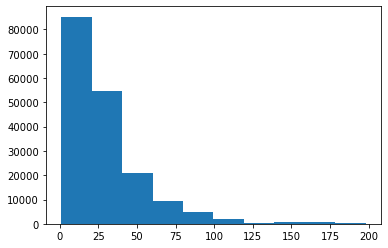

In [111]:
plt.hist(data1.Count_Column, bins = 10)

In [118]:
prueba = data1[data1['Count_Column']<=10]

In [119]:
prueba.body.values

array(['consulta desde whatsapp', 'lunes de marzo en la manana',
       'consulta desde whatsapp', ..., 'hola',
       'este ticket ha sido resuelto por inactividad del agente',
       'buenos dias sera q hoy si  me pondran  el telefono graciasworried'],
      dtype=object)

In [120]:
prueba

,id_zendesks,assignee_id,nombre_assignee,fecha_zendesk,group_id_chat,grupo_homologado,subject,tags_zendesk,time_spent_last_update_sec,total_time_spent_sec,...,Tipo de Gestión :: Residencial,Ticket Group,Ticket Status,Ticket Assignee,Date (Ticket Solved),AHT,Número de Celular,bodylen,tipo_respuesta,Count_Column
178,35175976,405595868753,DanielJ_WpHogar,2021-03-08 13:01:41.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_reopen, admin_ticket_ate...",286,670,...,Instalacion Nueva :: Informacion Visita Tecnic...,CO :: B2C :: WhatsApp Hogares,Closed,djimecor_WpHogar,2021-03-08,16,573183863246,23,recibe respuesta,7
177,35175976,405595868753,DanielJ_WpHogar,2021-03-08 13:01:41.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_reopen, admin_ticket_ate...",286,670,...,Instalacion Nueva :: Informacion Visita Tecnic...,CO :: B2C :: WhatsApp Hogares,Closed,djimecor_WpHogar,2021-03-08,16,573183863246,27,recibe respuesta,7
146,35176015,418999452634,AngieC_WpHogar,2021-03-08 13:02:49.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_cerrar, admin_nps_enviad...",12,836,...,Visita Tecnica/Averias :: Informacion Visita T...,CO :: B2C :: WhatsApp Hogares,Closed,acamacco_WpHogar,2021-03-08,14,573508743630,23,recibe respuesta,7
166,35176017,420980076134,KELLY MILENA CORREA CORTES,2021-03-08 13:02:50.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_ticket_atendido, admin_t...",67,94,...,NaN,CO :: B2C :: WhatsApp Hogares,Closed,NaN,2021-03-08,2,573142785500,23,recibe respuesta,6
167,35176017,420980076134,KELLY MILENA CORREA CORTES,2021-03-08 13:02:50.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_ticket_atendido, admin_t...",67,94,...,NaN,CO :: B2C :: WhatsApp Hogares,Closed,NaN,2021-03-08,2,573142785500,48,recibe respuesta,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291763,35458249,nan,NaN,2021-03-14 22:33:47.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,Television - Cable :: Intermitencia-Inestabili...,CO :: Soporte Técnico,Closed,NaN,2021-03-16,6,573122899166,4,recibe respuesta,10
291764,35458249,nan,NaN,2021-03-14 22:33:47.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,Television - Cable :: Intermitencia-Inestabili...,CO :: Soporte Técnico,Closed,NaN,2021-03-16,6,573122899166,4,recibe respuesta,10
291765,35458249,nan,NaN,2021-03-14 22:33:47.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,Television - Cable :: Intermitencia-Inestabili...,CO :: Soporte Técnico,Closed,NaN,2021-03-16,6,573122899166,4,recibe respuesta,10
297147,35445522,nan,NaN,2021-03-14 15:36:51.000000,360008124954,CO :: B2C :: WhatsApp Hogares,Solicitud de ayuda con asesor desde whatsapp,"admin_botnotif, admin_tigobot, ambiente_person...",nan,nan,...,Factura/Cobro :: Notificacion de Cobro :: Se B...,CO :: B2C :: WhatsApp Hogares,Closed,lyvelebe_WpHogar,2021-03-15,7,573118902311,55,inactivo,9


In [94]:
len(prueba)/len(data1) * 100

47.39064856711915

In [86]:
prueba1 = data1[data1['bodylen']<=35]

In [87]:
prueba1["body"].values

array(['consulta desde whatsapp', 'hola',
       'buenas noches cuentanos por favor eres el titular para proceder con la activacion por favor confirmanos tus datosnombre completo y numero de cedulanumero de contacto fijomovilcorreo electronicodireccion del servicio',
       'yudy jaidibi rodriguez rodriguezidentificacion del cliente',
       'hola', 'quisiera obtener mi pin de canales hit', 'hot',
       'confirmanos por favor eres la titular', 'no',
       'para ello debe de comunicarse con nosotros la titular directamente de su cuenta o a nuestra linea gratis movil tigo y fijos feliz noche',
       'gracia', 'resuelto'], dtype=object)

In [67]:
data1['body'].values

array([' con cual de las siguientes entidades usted tiene o ha tenido en los ultimos anos entre marzo de y febrero de ununa cuenta de ahorrobanco coomeva sabancolombia sabanco finandina s abanco av villas sabanco agrario de colombia saninguna de las anteriores',
       'vamos a trabajar en tu solicitud y en un momento estaremos contigo nuevamente para brindarte toda la informacion',
       'hola xiomy acero ruiz   te damos la bienvenida a nuestro canal de atencion digital nos encanta leer eso xiomy confirmanos la direccion en la que requieres el servicio es la terminada en   piso en la ciudad de bogota',
       ..., 'consulta desde whatsapp',
       'no se cual es el numero de contrato del servicio que tengo en san javier y que fecha pagar',
       'tengo servicios activos con ustedes'], dtype=object)

In [68]:
data1['body'] = data1['body'].str.replace('[^\w\s#@/:%.,_-]', ' ', flags=re.UNICODE)

C:\Users\dgarmor\.conda\envs\Environments\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
#guion = pd.read_excel('C:/Users/eduranpu/Documents/Guiones.xlsx')
#guion['body'] = guion['body'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [70]:
# Limpieza, carecteres especiales y signos de puntuacion
#def limpieza_Guion(body):
    #body = body.lower()
    #body = re.sub(" \d+",' ', body) #Eliminar numeros
    #body = re.sub('[^a-z ]',' ', body) #quitar numeros dentro de palabras
    #body = re.sub('\[#*.>=\]','',body) # Eliminar caracteres 
    #body = re.sub('[%s]' %re.escape(string.punctuation),' ', body) # Eliminar signos puntuacion
    #body= re.sub(r"[\r\n]+",' ', body)
    #body= re.compile(r'\bLiza\b').sub(' ', body)

    #return body
#limpiarGuion= lambda x: limpieza_Guion(x)

In [71]:
#guion["body"] = guion["body"].apply(limpiarGuion)

In [72]:
#guion.body = guion.body.str.replace('\s+', ' ')

In [73]:
#guion

In [74]:
#guion.to_excel("D:/guioneslimpios.xlsx",index=False)

In [75]:
data1['tipo_respuesta'] = np.where(data1['body'].str.contains('(?=.*inactividad)',regex=True),                                                                                                                     
                        'inactivo', 'recibe respuesta')

C:\Users\dgarmor\.conda\envs\Environments\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
inactivo=data1[data1['tipo_respuesta']=="inactivo"] 

In [77]:
data1=data1.sort_values(by=['fecha_cat'])

In [78]:
data1['body'] = data1['body'].fillna('').astype(str)
data1_grouped = data1.groupby('id_zendesks')['body'].apply(' '.join)
#data1_grouped = data1.groupby(['id_zendesks'])['body'].transform(lambda x: ' '.join(x))
data1_g= pd.DataFrame(data1_grouped.reset_index(name = "texto"))

print(data1_g)

      id_zendesks                                              texto
0        35169636  consulta desde whatsapp buenas noches cuentano...
1        35170490  consulta desde whatsapp paquete premium buenas...
2        35173165  consulta desde whatsapp deseo reconectar los s...
3        35175952  consulta desde whatsapp solicitu de pago parci...
4        35175968  consulta desde whatsapp valledupar no tengo re...
...           ...                                                ...
11252    35460662  consulta desde whatsapp hace alrededor de anos...
11253    35460673  consulta desde whatsapp llevo mas de dias espe...
11254    35460709  consulta desde whatsapp quisiera poder pagar e...
11255    35460721  consulta desde whatsapp alejandromonsalvegiral...
11256    35460737  consulta desde whatsapp no se cual es el numer...

[11257 rows x 2 columns]


In [79]:
# Limpieza, carecteres especiales y signos de puntuacion
def limpieza_final(texto):
    texto=re.sub(pattern= r"consulta desde whatsapp", repl=' ', string=texto)
    texto=re.sub(pattern= r"hola te damos la bienvenida al Canal de atencion digital de tigo", repl=' ', string=texto)
    texto=re.sub(pattern= r"te damos la bienvenida al canal de atencion digital de tigo", repl=' ', string=texto)
    texto=re.sub(pattern= r"te damos la bienvenida a nuestro canal sentimos que hayas tenido que esperar mas de lo normal ya estamos listos para ayudarte en lo que necesites", repl=' ', string=texto)
    texto=re.sub(pattern= r"fue un gusto atenderte no dudes en comunicarte de nuevo si lo consideras necesario que tengas un feliz dia", repl=' ', string=texto)
    texto=re.sub(pattern= r"como sabemos la importancia de tus servicios de telecomunicaciones y teniendo en cuenta la coyuntura del pais", repl=' ', string=texto)
    texto=re.sub(pattern= r"solo haz clic en el siguiente enlace y sigue los pasos b.tigo.com/d-factura", repl=' ', string=texto)
    texto=re.sub(pattern= r" recuerda que por este medio siempre estamos dispuestos a ayudarte", repl=' ', string=texto)
    texto=re.sub(pattern= r"consulta las ultimas 2 facturas y descargalas a traves de Mi Tigo. Si no estas registrado hazlo es facilisimo En b.tigo.com/mtw una vez ingreses ve a la seccion de Facturacion, elige la factura que necesitas y haz clic en la opcion pdf conoce todo lo que puedes hacer en Mi Tigo aqui b.tigo.com/c-mitigo", repl=' ', string=texto)       
    texto=re.sub(pattern= r"Ayudemos al medio ambiente recibiendo siempre tu factura via correo electronico la tienes siempre a la mano puedes pagarla en línea y juntos aportamos a un mundo mejor te inscribo ya", repl=' ', string=texto)           
    texto=re.sub(pattern= r"en tigo sabemos lo importantes que son los servicios de telecomunicaciones en tu hogar y entendemos que es un momento retador para todos asi que a pesar de la suspension dejaremos disponibles sin cobro durante el mes de abril los servicios que tenias contratados con nosotros con unos atributos minimos basicos", repl=' ', string=texto)
    texto=re.sub(pattern= r"podras disfrutar de 14 canales de television en SD", repl=' ', string=texto)    
    texto=re.sub(pattern= r"navegar en Internet hasta 2 megas puede variar de acuerdo con la tecnologia", repl=' ', string=texto)              
    texto=re.sub(pattern= r"esta facilidad aplica sobre los consumos del mes de abril una vez te pongas al dia en los saldos pendientes se restablecera el plan como lo venias disfrutando antes de la suspension", repl=' ', string=texto)              
    texto=re.sub(pattern= r"para nosotros tambien es super importante la seguridad de tu red", repl=' ', string=texto)                        
    texto=re.sub(pattern= r"latencia es el tiempo que se demora en cargar una peticion en Internet como abrir una página en la Web un video o una imagen ingresa al siguiente enlace para conocer mas b.tigo.com/todowifi", repl=' ', string=texto)             
    texto=re.sub(pattern= r"la velocidad de bajada es la que necesita el computador para descargar archivos de Internet tales como videos fotos consultar una pagina entre otros el valor que muestra el medidor sera igual a la velocidad adquirida este valor podra ser mucho menor si estas conectado a una red inalambrica pues esta es mas inestable y varia segun la cercania al modem. Conoce los conceptos con mayor detalle en el siguiente enlace b.tigo.com/todowifi", repl=' ', string=texto)
    texto=re.sub(pattern= r"la velocidad de subida es la necesaria para cargar o subir archivos de tu computador a Internet el valor que muestra el medidor siempre sera menor a la velocidad adquirida debido a que se necesita menos velocidad para subir archivos a la web si quieres conocer mas te invitamos a ingresar a este link: b.tigo.com/m-velocidad", repl=' ', string=texto)            
    texto=re.sub(pattern= r"te ofrezco disculpas por esta situacion por este medio estamos siempre dispuestos para ti", repl=' ', string=texto)            
    texto=re.sub(pattern= r"sabemos lo importantes que son para ti ", repl=' ', string=texto)
    texto=re.sub(pattern= r"en tigo agradecemos tu compresion", repl=' ', string=texto)                
    texto=re.sub(pattern= r"de lo que si estamos seguros es de darte una buena conexion y la informacion que necesitas para conocer a fondo tu wifi aqui b.tigo.com/todowifi", repl=' ', string=texto)           
    texto=re.sub(pattern= r"ya puedes cambiar tu clave wifi de manera mas sencilla por nuestro sitio web haz clic b.tigo.com/mtw ingresa con tus datos si no estas registrado hazlo es facilisimo en la opcion personaliza tu wifi puedes ingresar el nombre de red y contraseña deseada", repl=' ', string=texto)            
    texto=re.sub(pattern= r"teniendo en cuenta la necesidad de prevenir la propagacion del Coronavirus, es necesario que nos respondas la siguiente pregunta n tu vivienda hay alguien en que actualmente presente sintomas de gripa este en cuarentena sea mayor de 70 años o que haya regresado de algun viaje del exterior", repl=' ', string=texto)
    texto=re.sub(pattern= r"estamos comprometidos con la prevencion del coronavirus por eso para evitar el contagio a nosotros y nuestros clientes no podremos realizar la visita por el momento. Lo sentimos y te agradecemos tu comprension Contactanos cuando se haya recuperado la persona para volver a programar tu visita", repl=' ', string=texto)            
    texto=re.sub(pattern= r"en tigo estamos comprometidos con tu cuidado por ello en tu visita tecnica toma las siguientes precauciones", repl=' ', string=texto)             
    texto=re.sub(pattern= r"recuerda no saludar de mano a nuestros tecnicos", repl=' ', string=texto)           
    texto=re.sub(pattern= r"antes de utilizar los equipos que instalamos controles remotos modem decodificadores limpialos muy bien", repl=' ', string=texto)             
    texto=re.sub(pattern= r"estamos garantizando que el personal tecnico que te visite no presente ningun sintoma de gripa", repl=' ', string=texto)           
    texto=re.sub(pattern= r"debido a la situación actual es importante que sepas que podran aumentar los tiempos para la asignacion de visitas", repl=' ', string=texto)             
    texto=re.sub(pattern= r"disponibilidad para visita de instalacion en caso que tu direccion sea rural o no tenga nomenclatura compartenos una captura de tu factura de servicio publicos", repl=' ', string=texto) 
    texto=re.sub(pattern= r"la siguiente información es muy importate asi todo quedara super claro", repl=' ', string=texto)           
    texto=re.sub(pattern= r"la resolución generada por la comision de regulacion de telecomunicaciones entro en vigencia el de enero del y esta nos dice que un servicio de Internet es considerado Banda Ancha si cuenta con mínimo MB de bajada puedes estar tranquilo este cambio no afecta el servicio que tienes con nosotros seguiras disfrutando tu servicio de internet como hasta ahora", repl=' ', string=texto)
    texto=re.sub(pattern= r"en tigo tenemos lo mejor para ti contamos con la comunidad tigo canales hd incluidos contenido exclusivo y canales premium hbo y fox adicional tenemos tigo play para que lleves el entretenimiento a todas partes encuentra series peliculas y mas one tv es una excelente opcion para los amantes de la television es una mezcla de tecnologia e innovacion de punta para que con aplicaciones como fox y youtube disfrutes de los mejores contenidos por supuesto tambien contamos con internet de altas velocidades para que siempre estes conectado", repl=' ', string=texto)             
    texto=re.sub(pattern= r"pero como no queremos que nos dejes nos contactaremos contigo para ofrecerte algo que te llenara de felicidad esparanos tenemos grandes ofertas para ti", repl=' ', string=texto) 
    texto=re.sub(pattern= r"te contamos que ya puedes consultar toda la información de tu empresa a traves de nuestro portal tigo Bussines ingresa a nuestro sitio web  en la parte superior izquierda encontraras la opcion empresas alli visualizaras todos los estados de cuenta e informacion relevante que seguro sera de tu interes cuentanos los datos de tu empresa que ingresaste en este chat estan correctos", repl=' ', string=texto) 
    texto=re.sub(pattern= r"consulta desde whatsapp", repl=' ', string=texto) 
    texto=re.sub(pattern= r"articles source", repl=' ', string=texto)
    texto=re.sub(pattern= r"para nosotros también es súper importante la seguridad de tu red", repl=' ', string=texto)
    texto=re.sub(pattern= r"fue un placer atenderte en las proximas horas recibiras un mensaje de texto con una breve encuesta danos un si te gusto nuestra atencion hacemos todo para que estes conectadosiempre", repl=' ', string=texto)
    texto=re.sub(pattern= r"para nosotros tambien es super importante la seguridad de tu red ", repl=' ', string=texto)
    texto=re.sub(pattern= r"fue un gusto atenderte no dudes en comunicarte de nuevo si lo consideras necesario que tengas un feliz dia", repl=' ', string=texto)
    texto=re.sub(pattern= r"fue un gusto atenderte no dudes en comunicarte de nuevo si lo consideras necesario que tengas un feliz dia", repl=' ', string=texto)
    texto=re.sub(pattern= r"en las proximas horas recibiras un mensaje de texto con una breve encuesta danos un si te gusto nuestra atencion hacemos todo para que estes conectadosiempre", repl=' ', string=texto)
    texto=re.sub(pattern= r"te damos la bienvenida a nuestro canal de atencion digital", repl=' ', string=texto)
    texto=re.sub(pattern= r"recuerda que ante cualquier duda o inconveniente estaremos aqui para ti fue un placer atenderte que tengas un feliz dia ", repl=' ', string=texto)
    texto=re.sub(pattern= r"conectadosiempre", repl=' ', string=texto)
    texto=re.sub(pattern= r"blush", repl=' ', string=texto)
    texto=re.sub(pattern= r" te damos la bienvenida a nuestro canal sentimos que hayas tenido que esperar mas de lo normal ya estamos listos para ayudarte en lo que necesite", repl=' ', string=texto)
    texto=re.sub(pattern= r"articles source", repl=' ', string=texto)
    texto=re.sub(pattern= r"blue heart", repl=' ', string=texto)
    texto=re.sub(pattern= r"para nosotros tambien es super importante la seguridad de tu red ", repl=' ', string=texto)
    texto=re.sub(pattern= r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",repl=' ', string=texto)
    texto=re.sub(pattern= r"recuerda que ante cualquier duda o inconveniente estaremos aqui para ti que tengas un feliz dia", repl=' ', string=texto)
    texto=re.sub(pattern= r"es un gusto atenderte a traves de nuestros canales digitales tigo", repl=' ', string=texto)
    texto=re.sub(pattern= r"we apologize for the situation", repl=' ', string=texto)
    texto=re.sub(pattern= r"de manera diligente", repl=' ', string=texto)
    texto=re.sub(pattern= r"te deseamos un feliz resto de dia blue heart gracias", repl=' ', string=texto)
    texto=re.sub(pattern= r"thumbsup", repl=' ', string=texto)
    texto=re.sub(pattern= r"rage rage rage rage rage rage", repl=' ', string=texto)
    texto=re.sub(pattern= r"recuerda que es indispensable que un adulto este en casa si en tu hogar hay alguien con sintomas de gripa en cuarentena que llego del exterior o adultos mayores de anos nuestro tecnico no podra ingresar debido a la situacion actual ", repl=' ', string=texto) 
    texto=re.sub(pattern= r"drinconj", repl=' ', string=texto)
    texto=re.sub(pattern= r"recuerda que es indispensable que un adulto este en casa si en tu hogar hay alguien con sintomas de gripa en cuarentena que llego del exterior o adultos mayores de anos nuestro tecnico no podra ingresar debido a la situacion actual es importante que sepas que podran aumentar los tiempos para la asignacion de visitas si deseas cancelar o modificar la agenda de tu visita lo puedes realizar desde el siguiente enlace un gusto atenderte en los proximos minutos recibiras un mensaje de texto con una breve encuesta danos un si te gusto nuestra atencion hacemos todo para que estes", repl=' ', string=texto)
    texto=re.sub(pattern= r"hola", repl=' ', string=texto)
    texto=re.sub(pattern= r"nos estamos poniendo en contexto con tu solicitud para ofrecerte la mejor solucion y en un momento estaremos contigo", repl=' ', string=texto)
    texto=re.sub(pattern= r"desde cualquier lugar ingresa a nuestro portal mi tigo haciendo clic btigocommtw en la opcion paga tu factura tambien contamos con entidades de pago a nivel nacional bancolombia davivienda banco bbva banco de bogota banco gnb sudameris encuentra el punto mas cercano en tu ciudad aqui btigocommpago recuerda que puedes adquirir nuestra promocion de servicios premium como hbo go con el de descuento por mesesfue un placer atenderte en tigo estamosdetulado", repl=' ', string=texto)
    texto=re.sub(pattern= r" si te gusto nuestra atencion danos la mejor calificacion a traves del enlace que recibiras en un mensaje texto", repl=' ', string=texto)    
    texto=re.sub(pattern= r" nos alegra mucho leer tu mensaje fue un gusto atenderte te deseamos un feliz dia", repl=' ', string=texto)
    texto=re.sub(pattern= r"aaaaaaaaaaaaa", repl=' ', string=texto)
    
    return texto
limpiarFinal = lambda x: limpieza_final(x)

In [80]:
data1_g["texto"] = data1_g["texto"].apply(limpiarFinal)

In [81]:
data1_g.texto = data1_g.texto.str.replace('\s+', ' ')

In [82]:
data1_g['tipo_respuesta'] = np.where(data1_g['texto'].str.contains('(?=.*inactividad)',regex=True),                                                                                                                     
                        'inactivo', 'recibe respuesta')

In [83]:
data1_g['tipo_respuesta'].value_counts()

recibe respuesta    11224
inactivo               33
Name: tipo_respuesta, dtype: int64

In [84]:
inactivo=data1_g[data1_g['tipo_respuesta']=="inactivo"] 

In [85]:
del(inactivo['tipo_respuesta'] )

In [86]:
inactivo

,id_zendesks,texto
431,35183119,esperamos que te encuentres muy bien cuentano...
1007,35195696,revisar el estado de una solicitud quiero ver...
1096,35197283,amerikgmailcom como vas es un gusto saludarte...
1570,35206476,me llego un aumento en la factura y estoy ten...
2406,35231242,solicitar otro plan mas economico cancelar ca...
2436,35231883,cryptowinner cuentanos cual es el motivo de t...
2547,35233943,diegoarrietagmailcom atencion al cliente dieg...
2754,35237759,chutadoaragmailcom me estan cobrando dos fact...
3413,35250179,necesito suspender los servicios y dejar solo...
3624,35254448,retiro de tigo diana esperamos estes muy bien...


In [87]:
data2_g=data1_g[data1_g['tipo_respuesta']!="inactivo"] 

In [88]:
del(data2_g['tipo_respuesta'] )

In [89]:
data2_g

,id_zendesks,texto
0,35169636,buenas noches cuentanos por favor eres el tit...
1,35170490,paquete premium buenas noches angelica es un ...
2,35173165,deseo reconectar los servicios de internet ti...
3,35175952,solicitu de pago parcial pago parcial maurici...
4,35175968,valledupar no tengo recursos y cancele desde ...
...,...,...
11252,35460662,hace alrededor de anos no tengo el servicio c...
11253,35460673,llevo mas de dias esperando un traslado y no ...
11254,35460709,quisiera poder pagar el valor total de la fac...
11255,35460721,alejandromonsalvegiraldogmailcom pagar solo e...


In [66]:
a = data2_g[data2_g["id_zendesks"]==28302391] #28302391

In [67]:
a["texto"].values

array([], dtype=object)

In [90]:
data2_g

,id_zendesks,texto
0,35169636,buenas noches cuentanos por favor eres el tit...
1,35170490,paquete premium buenas noches angelica es un ...
2,35173165,deseo reconectar los servicios de internet ti...
3,35175952,solicitu de pago parcial pago parcial maurici...
4,35175968,valledupar no tengo recursos y cancele desde ...
...,...,...
11252,35460662,hace alrededor de anos no tengo el servicio c...
11253,35460673,llevo mas de dias esperando un traslado y no ...
11254,35460709,quisiera poder pagar el valor total de la fac...
11255,35460721,alejandromonsalvegiraldogmailcom pagar solo e...


In [91]:
data1_g = data2_g.copy()

In [92]:
data1_g['texto_len'] = data1_g.texto.str.split().str.len()

In [93]:
data1_g

,id_zendesks,texto,texto_len
0,35169636,buenas noches cuentanos por favor eres el tit...,73
1,35170490,paquete premium buenas noches angelica es un ...,167
2,35173165,deseo reconectar los servicios de internet ti...,322
3,35175952,solicitu de pago parcial pago parcial maurici...,40
4,35175968,valledupar no tengo recursos y cancele desde ...,155
...,...,...,...
11252,35460662,hace alrededor de anos no tengo el servicio c...,40
11253,35460673,llevo mas de dias esperando un traslado y no ...,21
11254,35460709,quisiera poder pagar el valor total de la fac...,18
11255,35460721,alejandromonsalvegiraldogmailcom pagar solo e...,16


In [94]:
data1_g.texto[0]

' buenas noches cuentanos por favor eres el titular para proceder con la activacion por favor confirmanos tus datosnombre completo y numero de cedulanumero de contacto fijomovilcorreo electronicodireccion del servicio yudy jaidibi rodriguez rodriguezidentificacion del cliente quisiera obtener mi pin de canales hit confirmanos por favor eres la titular para ello debe de comunicarse con nosotros la titular directamente de su cuenta o a nuestra linea gratis movil tigo y fijos feliz noche resuelto'

In [95]:
data1_g.texto_len.value_counts()

7      95
19     84
3      81
43     81
8      81
       ..
882     1
874     1
818     1
770     1
859     1
Name: texto_len, Length: 704, dtype: int64

In [97]:
data2_g

,id_zendesks,texto
0,35169636,buenas noches cuentanos por favor eres el tit...
1,35170490,paquete premium buenas noches angelica es un ...
2,35173165,deseo reconectar los servicios de internet ti...
3,35175952,solicitu de pago parcial pago parcial maurici...
4,35175968,valledupar no tengo recursos y cancele desde ...
...,...,...
11252,35460662,hace alrededor de anos no tengo el servicio c...
11253,35460673,llevo mas de dias esperando un traslado y no ...
11254,35460709,quisiera poder pagar el valor total de la fac...
11255,35460721,alejandromonsalvegiraldogmailcom pagar solo e...


In [98]:
#data2_g.texto2 = data2_g.texto.apply(lambda x : x.rsplit(maxsplit=len(x.split())-2)[0])
#print(data2_g)

In [99]:
data2_g.to_excel("D:/Gabo/datamarzo.xlsx",index=False)

In [100]:
inactivo.to_excel("D:/Gabo/chatInactivosmarzo.xlsx",index=False)